In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear_spline_coefficients(x, y):
    n = len(x) - 1
    coefficients = []
    for i in range(n):
        b = y[i]
        a = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
        coefficients.append((a, b))
    return coefficients;

In [3]:
def evaluate_linear_spline(x, coefficients, query_points):
    interpolated_values = []
    for t in query_points:
        for i in range(len(x) - 1):
            if x[i] <= t <= x[i + 1]:
                a, b = coefficients[i]
                delta_t = t - x[i]
                interpolated_values.append(b + a * delta_t)
                break
    return np.array(interpolated_values)

In [4]:
def display_Ab(A, b):
    print(f"{'=' * 50}")
    print("Matrix A:")
    print(np.array_str(A, precision=3, suppress_small=True))
    print("Vector b:")
    print(np.array_str(b, precision=3, suppress_small=True))
    print(f"{'-' * 50}")

In [5]:
def quadratic_spline_coefficients(x, y):
    n = len(x) - 1
    A = np.zeros((3 * n, 3 * n))
    b = np.zeros(3 * n)
    
    row = 0
    for i in range(n):
        A[row, 3 * i] = x[i] ** 2
        A[row, 3 * i + 1] = x[i]
        A[row, 3 * i + 2] = 1
        b[row] = y[i]
        row += 1
        
        A[row, 3 * i] = x[i + 1] ** 2
        A[row, 3 * i + 1] = x[i + 1]
        A[row, 3 * i + 2] = 1
        b[row] = y[i + 1]
        row += 1
        
    for i in range(1, n):
        A[row, 3 * (i - 1)] = 2 * x[i]
        A[row, 3 * (i - 1) + 1] = 1
        A[row, 3 * i] = -2 * x[i]
        A[row, 3 * i + 1] = -1
        b[row] = 0
        row += 1
        
    A[row, 0] = 2
    b[row] = 0
    row += 1
        
    display_Ab(A, b)
        
    coefficients = np.linalg.solve(A, b)
    return coefficients.reshape(n, 3)

In [6]:
def evaluate_quadratic_spline(x, coefficients, query_points):
    interpolated_values = []
    for t in query_points:
        for i in range(len(x) - 1):
            if x[i] <= t <= x[i + 1]:
                A, B, C = coefficients[i]
                interpolated_values.append(A * t ** 2 + B * t + C)
                break
    return np.array(interpolated_values)

In [7]:
Day = np.array([1, 2, 3, 4, 5, 6, 7])
Daily_Expenes= np.array([110, 20, 50, 90, 60, 120, 70])

coefficients = quadratic_spline_coefficients(Day, Daily_Expenes)

query_points = [3.5]
interpolated_values = evaluate_quadratic_spline(Day, coefficients, query_points)

print(np.array_str(coefficients, precision=3,suppress_small=True))

print("Quadratic Spline Interpolation Results:")

for t, h in zip(query_points, interpolated_values):
    print(f"Estimated fx at x={t:.2f} : {h:.2f}")

Matrix A:
[[  1.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  4.   2.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   4.   2.   1.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   9.   3.   1.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   9.   3.   1.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  16.   4.   1.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  16.   4.   1.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  25.   5.   1.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  25.   5.
    1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  36.   6.
    1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0

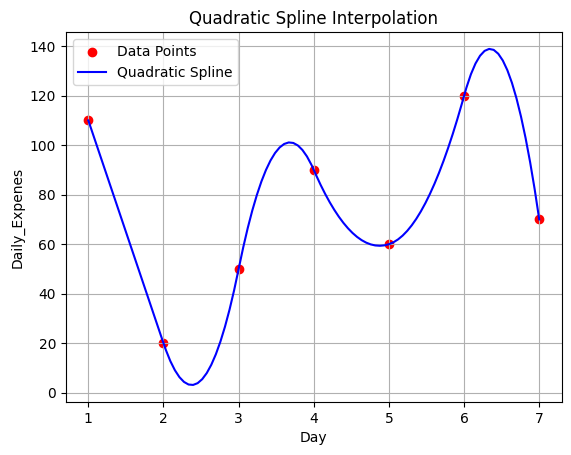

In [8]:
t_fine = np.linspace(Day[0], Day[-1], 100)
spline_values = evaluate_quadratic_spline(Day, coefficients, t_fine)

plt.scatter(Day, Daily_Expenes, color='red', label='Data Points')
plt.plot(t_fine, spline_values, label='Quadratic Spline', color='blue')
plt.xlabel('Day')
plt.ylabel('Daily_Expenes')
plt.title('Quadratic Spline Interpolation')
plt.legend()
plt.grid()
plt.show()

In [9]:
coefficients = np.polyfit(Day, Daily_Expenes, 1)
linear_model = np.poly1d(coefficients)

poly_coefficients = np.polyfit(Day, Daily_Expenes, 2)
quadratic_model = np.poly1d(poly_coefficients)

extrapolated_x = np.arange(1, 11)
linear_y = linear_model(extrapolated_x)
linear_total = np.sum(linear_y)
quadratic_y = quadratic_model(extrapolated_x)
quadratic_total = np.sum(quadratic_y)
print(f"Total money spent by day 10 using linear extrapolation: {linear_total}")
print(f"Total money spent by day 10 using quadratic extrapolation: {quadratic_total}")

Total money spent by day 10 using linear extrapolation: 791.0714285714287
Total money spent by day 10 using quadratic extrapolation: 953.5714285714291


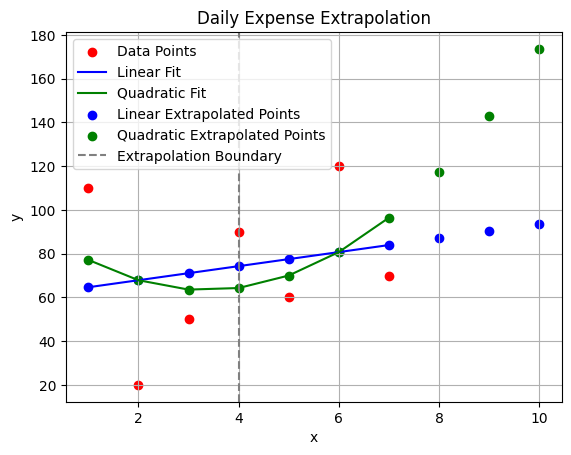

In [10]:
plt.scatter(Day, Daily_Expenes, color='red', label='Data Points')
plt.plot(Day, linear_model(Day), label='Linear Fit', color='blue')
plt.plot(Day, quadratic_model(Day), label='Quadratic Fit', color='green')

plt.scatter(extrapolated_x, linear_y, color='blue', label='Linear Extrapolated Points')
plt.scatter(extrapolated_x, quadratic_y,color='green', label='Quadratic Extrapolated Points')

plt.axvline(4, color='gray', linestyle='--',label='Extrapolation Boundary')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Daily Expense Extrapolation')
plt.grid()
plt.show()